#### This project uses python 3.8.5, tensorflow 2.4.1 , cuda 11.2, cudnn 8.0.4

#  Automatic Car Number Plate recognition 

### -  Arunit Mukherjee

# Create File Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

### Install pytorch gpu for easy ocr (optional gpu usage)

In [ ]:
# install pytorch if you have windows, cuda 11 installed. for other config refer pytorch website. 
!pip install torch==1.9.1+cu111 torchvision==0.10.1+cu111 torchaudio===0.9.1 -f https://download.pytorch.org/whl/torch_stable.html

# Import libraries

In [6]:
import cv2 
import numpy as np

import csv
import uuid

import easyocr

from matplotlib import pyplot as plt
%matplotlib inline

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [ ]:
# https://www.tensorflow.org/install/source_windows

In [7]:
if os.name=='nt':
    !pip install wget
    import wget

In [8]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [9]:
# Install Tensorflow Object Detection 
 # if the tar is not able to extract the zip file do  it manually 


if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.18.0/protoc-3.18.0-win64.zip"
    wget.download(url)
    !move protoc-3.18.0-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.18.0-win64.zip  # unzip manually in protoc folder path
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))  # adds the bin to the environment path variable 
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

        1 file(s) moved.


tar: This does not look like a tar archive
tar: Skipping to next header
tar: #: Not found in archive
tar: unzip: Not found in archive
tar: manually: Not found in archive
tar: in: Not found in archive
tar: protoc: Not found in archive
tar: folder: Not found in archive
tar: path: Not found in archive
tar: Exiting with failure status due to previous errors


        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\flexible_grid_a

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-38: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-38: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-38: module MAY be using inspect.stack
error: avro-python3 1.10.2 is installed but avro-python3!=1.9.2,<1.10.0,>=1.8.1 is required by {'apache-beam'}



copying object_detection\protos\model_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\multiscale_anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\optimizer_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\pipeline_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\post_processing_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\preprocessor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\region_similarity_calculator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\square_box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\ssd_anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\ssd_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\string_int_label_map_pb2.py -> build\lib\object_detect

Obtaining file:///W:/python%20programming/numberplate/Tensorflow/models/research/slim
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [10]:
# run this verification script to check TF object detection API. Scroll down, The last line should say OK.
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2021-10-06 07:02:34.363788: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
Running tests under Python 3.8.5: C:\Users\aruni\anaconda3\envs\rnn\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-10-06 07:02:38.921014: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-06 07:02:38.921583: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-10-06 07:02:38.951927: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: GeForce RTX 2060 SUPER computeCapability: 7.5
coreClock: 1.71GHz coreCount: 34 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-10-06 07:02:38.951961: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-

I1006 07:03:05.251938  2312 efficientnet_model.py:147] round_filter input=16 output=32
I1006 07:03:05.594010  2312 efficientnet_model.py:147] round_filter input=16 output=32
I1006 07:03:05.595016  2312 efficientnet_model.py:147] round_filter input=24 output=48
I1006 07:03:06.229154  2312 efficientnet_model.py:147] round_filter input=24 output=48
I1006 07:03:06.229154  2312 efficientnet_model.py:147] round_filter input=40 output=80
I1006 07:03:06.910307  2312 efficientnet_model.py:147] round_filter input=40 output=80
I1006 07:03:06.910307  2312 efficientnet_model.py:147] round_filter input=80 output=160
I1006 07:03:07.851520  2312 efficientnet_model.py:147] round_filter input=80 output=160
I1006 07:03:07.851520  2312 efficientnet_model.py:147] round_filter input=112 output=224
I1006 07:03:08.745723  2312 efficientnet_model.py:147] round_filter input=112 output=224
I1006 07:03:08.745723  2312 efficientnet_model.py:147] round_filter input=192 output=384
I1006 07:03:09.883978  2312 efficie

In [9]:
import object_detection # importing after installation of tfod api above

In [10]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

        1 file(s) moved.
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


#  Create Label Map

In [11]:
labels = [{'name':'licence', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# Create TF records

In [12]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [13]:
# cloning a popular tf record script from github
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [14]:
# creating tf record file for both train and test data
# you need to goto Tensorflow/scripts/generate_tfrecord, open in vscode, scroll down and change 'int member [4]' to 5 else it will caus error

!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


#  Copy Model Config to Training Folder

In [15]:
# pipeline config consists of all model parameters of our pretrained model that we want to do transfer learning with.

if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# Update Config For Transfer Learning

In [16]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [17]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [18]:
# the default config files have some paths left out as 'to be configured' that has to be replaced with our annotation path

config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 4e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.01
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.997
         scale: true
         epsilon: 0.001
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matcher {
     argmax_matcher {
       matched_threshold: 0.5
   

In [19]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [20]:
pipeline_config.model.ssd.num_classes = len(labels) # number of categories
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [21]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

#  Train the model

### Use these training lines only if you want to train again, else you can directly use the trained model below

In [28]:
# we are using our mobile ssd and the pipeline config to start training.
# If you want to train again make sure you remove the the 3 checkpoint files from the workspace/models/my_ssd_mobnet folder

TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [29]:
# generating the training command script. You can change the training steps here
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [30]:
print(command) # it is better to use this command in the anaconda prompt or windows shell to check the epoch details. Paste this into the shell

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=10000


In [ ]:
!{command}

#  Evaluate the Model

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [ ]:
# paste this into command prompt to get precision recall etc. You can also use tensorboard
print(command)


In [ ]:
!{command}

#  Load Train Model From Checkpoint

In [22]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [23]:
# prevent GPU complete usage

gpus=tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])
    except RunTimeError as e:
        print(e)

In [24]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial() # loading our checkpoint

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# Detect from an Image

In [25]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [26]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test3.jpg') # you can use your own images. Goto tensorflow/workspace/images

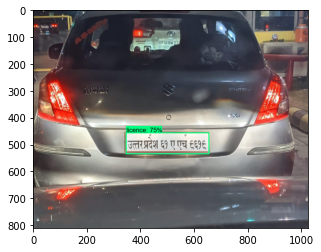

In [28]:
%matplotlib inline
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.7,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# Applying OCR

In [29]:
detection_threshold=0.5  # setting the threshold for detection. Increase/decrease as needed to get more bounding boxes

# OCR filtering

In [30]:
# setting threshold
region_threshold=0.05  
# increase/decrease to included smaller numbers/letters present in number plate. Lowering too much will OCR unimportant details in number plate

In [31]:
# filtering
# this function helps to apply ocr only if the area covered by the OCR detected region is greater than threshold set above.


def filter_text(region,ocr_result,region_threshold):
    rectangle_size=region.shape[0]*region.shape[1]
    plate=[]  # Stores result
    
    for result in ocr_result:
        length=np.sum(np.subtract(result[0][1],result[0][0]))
        height=np.sum(np.subtract(result[0][2],result[0][1]))
        
        if length*height/rectangle_size>region_threshold:
            plate.append(result[1])
        
       
     
    return plate  # returns filtered coordinates

# Complete OCR

In [32]:

# this function filters the ocr detection areas and selectively applies easy ocr in the selected areas

def ocr_plate(image,detections,detection_threshold,region_threshold):
    
    # Scores, boxes and classes above threshold
    scores=list(filter(lambda x: x>detection_threshold, detections['detection_scores']))
    boxes=detections['detection_boxes'][:len(scores)]
    classes=detections['detection_classes'][:len(scores)]
    
    # full image dimensions
    width=image.shape[1]
    height=image.shape[0]
    
    # looping through all detections and applying region filtering
    for idx,box in enumerate(boxes):
        roi=box*[height,width,height,width]
        region=image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        reader=easyocr.Reader(['en','hi','mr'])  # english , hindi, marathi
        ocr_result=reader.readtext(region)
        
        text= filter_text(region,ocr_result,region_threshold) # applies the filtering
        
        plt.imshow(cv2.cvtColor(region,cv2.COLOR_BGR2RGB))
        print(text)
        
        return text, region



['उत्तरप्रदश ६१ ए एच ६६१६']


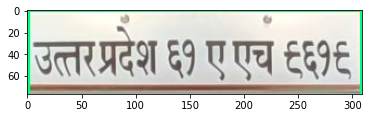

In [33]:
text,region=ocr_plate(image_np_with_detections,detections,detection_threshold,region_threshold) # main calling function

In [34]:
# saving results
# Create a new folder called 'Detected images in root project directory (where notebook is)'

def save_results(text,region,csv_filename,folder_path):
    img_name='{}.jpg'.format(uuid.uuid1())
    cv2.imwrite(os.path.join(folder_path,img_name),region)
    
    with open(csv_filename,encoding='utf-8',mode='a',newline='') as f:
        csv_writer=csv.writer(f,delimiter=',',quotechar='"',quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name,text])


In [35]:
save_results(text,region,'results.csv','Detected_images')  # excel is unable to display properly hindi, use notepad

In [36]:
# check the detected text
text

['उत्तरप्रदश ६१ ए एच ६६१६']

# using google translate api to detect language

In [37]:
from googletrans import Translator
detector=Translator()

for i in text:
    

   dec_lan=detector.translate(i)
   if dec_lan.src=='hi':
      print(i)
      print(dec_lan.text)  
      print('language is Hindi')
   elif dec_lan.src=='en':
      print(i)
      print(dec_lan.text)
      print('language is English')
   elif dec_lan.src=='mr':
      print(i)
      print(dec_lan.text)
      print('language is Marathi')
   else:
      print('language is Unkownn')
        

उत्तरप्रदश ६१ ए एच ६६१६
Uttar Pradesh 61 A H 6616
language is Hindi


# Real Time Detections from your Webcam

In [ ]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.5,
                agnostic_mode=False)
    
    try:
        text,region=ocr_plate(image_np_with_detections,detections,detection_threshold,region_threshold)
        save_results(text,region,'realtime_results.csv','Detected_images')
    except:
        pass
        

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break